Install Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import openpyxl
from scipy import stats

Read File

In [1]:
file = r'C:\Users\HP\OneDrive\Desktop\Tea Sales\2_2025\Sale 02 2025.csv'
df1 = pd.read_csv(file, header=0)
df1.head()

NameError: name 'pd' is not defined

In [74]:
selected_columns = ['Factory', 'Region', 'Price (Kshs)']
data = df[selected_columns]
data.head()


,Factory,Region,Price (Kshs)
0,CHINGA,East,413
1,GACHARAGE,East,446
2,GACHEGE,East,415
3,GATHUTHI,East,447
4,GATUNGURU,East,413


In [75]:
east_prices = df[df['Region'] == 'East']['Price (Kshs)']
west_prices = df[df['Region'] == 'West']['Price (Kshs)']

east_prices.head()


0    413
1    446
2    415
3    447
4    413
Name: Price (Kshs), dtype: int64

In [76]:
west_prices.head()

36    210
37    223
38    234
39    266
40    259
Name: Price (Kshs), dtype: int64

In [77]:
# 1. Mann-Whitney U Test (Non-parametric test)
mannwhitney_stat, mannwhitney_p_value = stats.mannwhitneyu(east_prices, west_prices, alternative='two-sided')
print(f'Mann-Whitney U Test: Statistic = {mannwhitney_stat}, P-value = {mannwhitney_p_value}')

# 2. Independent T-Test (Parametric test, assuming normality)
t_stat, t_p_value = stats.ttest_ind(east_prices, west_prices)
print(f'T-Test: Statistic = {t_stat}, P-value = {t_p_value}')

# Conclusion based on the Mann-Whitney U Test
if mannwhitney_p_value < 0.05:
    print("There is a significant difference in prices between the East and West regions (Mann-Whitney U Test).")
else:
    print("There is no significant difference in prices between the East and West regions (Mann-Whitney U Test).")

# Conclusion based on the T-Test
if t_p_value < 0.05:
    print("There is a significant difference in prices between the East and West regions (T-Test).")
else:
    print("There is no significant difference in prices between the East and West regions (T-Test).")

Mann-Whitney U Test: Statistic = 1187.0, P-value = 1.0879047722643321e-12
T-Test: Statistic = 26.242433322375362, P-value = 5.7055926275297706e-37
There is a significant difference in prices between the East and West regions (Mann-Whitney U Test).
There is a significant difference in prices between the East and West regions (T-Test).


C:\Users\HP\AppData\Local\Temp\ipykernel_1148\2565609091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Price (Kshs)', data=data, palette='Set2')


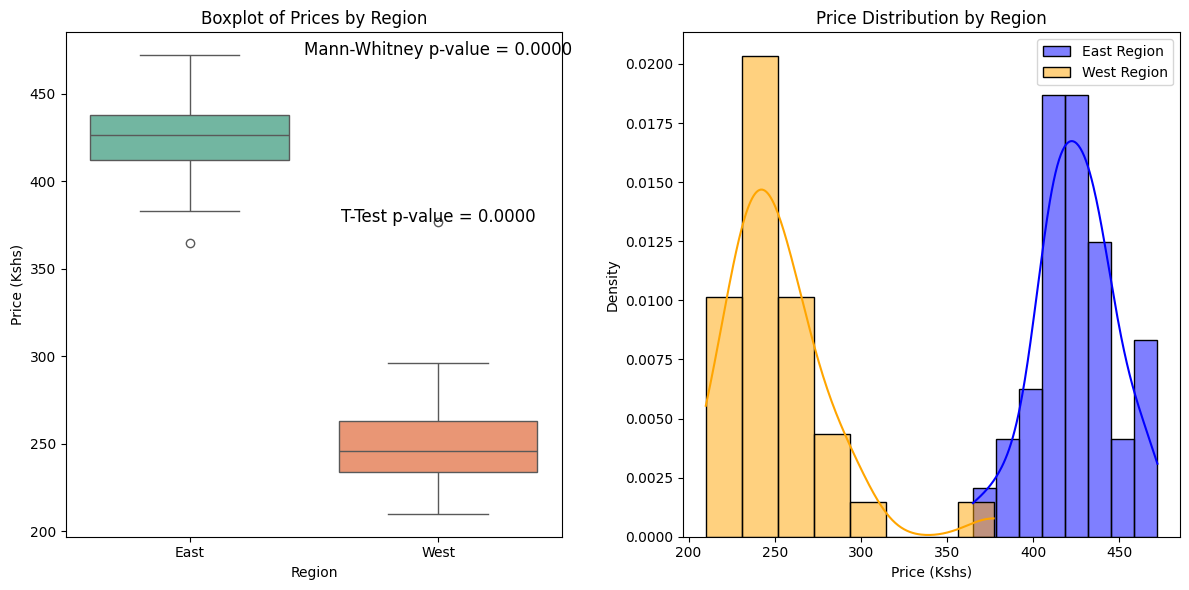

In [83]:
# Plotting
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='Price (Kshs)', data=data, palette='Set2')
plt.title('Boxplot of Prices by Region')

plt.text(1, max(east_prices), f'Mann-Whitney p-value = {mannwhitney_p_value:.4f}', 
         horizontalalignment='center', color='black', fontsize=12)

plt.text(1, max(west_prices), f'T-Test p-value = {t_p_value:.4f}', 
         horizontalalignment='center', color='black', fontsize=12)


# Histogram
plt.subplot(1, 2, 2)
sns.histplot(east_prices, kde=True, color='blue', label='East Region', stat='density', bins=8)
sns.histplot(west_prices, kde=True, color='orange', label='West Region', stat='density', bins=8)
plt.title('Price Distribution by Region')
plt.legend()

# Display plot
plt.tight_layout()
plt.show()